# Stupid BaseLine Model

In [129]:
#Import all necessary libraries to clean and check for data info()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('factory_data(classification).csv',na_values=['nan'])
df = df.dropna()
df=df.drop(['Unique ID','Product ID','Quality'],axis=1)

In [130]:
# pip install sklearn

In [131]:
#try different models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X= df.drop(['Machine Status'],axis=1)
y= df['Machine Status']



# Creating split validation
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.4, random_state=42)
# train = 0.6 test = 0.4
#

models = {
    'K-nearest neighbor': KNeighborsClassifier(),
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression':LogisticRegression(),
    'Decision Tree Regressor':DecisionTreeRegressor(),
    'gnb' : GaussianNB(),
    'LDA':LinearDiscriminantAnalysis(),
    'SVM':SVC(),
    'Logistic Regression':LogisticRegression(),
    'Dummy Classifier':DummyClassifier(),
}



0.9690530519110097
0.9881631488876212
0.9689104392470052
0.9890188248716486
0.9582144894466629
0.968625213918996
0.9674843126069596
0.9666286366229321


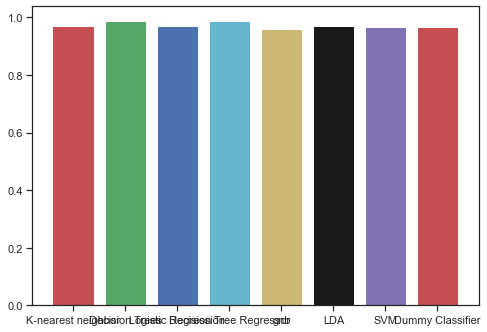

In [132]:
from sklearn.metrics import f1_score

f1_scores=[]
for name in models:
    model=models[name]
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    f1_scores.append(f1_score(y_test, y_hat))
    print(str(name)+str(f1_score(y_test, y_hat)))
plt.bar(models.keys(),f1_scores,color=['r','g','b','c','y','k','m','r'])
plt.show()




# Exploratory Data Analysis (EDA)


1.   Import Dataset
2.   Preprocess Data/Cleaning data
3.   Generate graphs to view 



In [133]:
#Import all necessary libraries to clean and check for data info()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('factory_data(classification).csv',na_values=['nan'])

In [134]:

#Unique ID and Product ID is removed as they only distract the model's capability to predict
Factory=df.drop(['Unique ID','Product ID'],axis=1)
Factory=Factory.rename(columns={"Ambient T (C)": "Ambient", "Process T (C)": "Process","Rotation Speed (rpm)":"Rotation_Speed",
"Torque (Nm)": "Torque","Tool Wear (min)": "Tool_Wear","Machine Status":"Machine_Status"})
Factory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quality         19009 non-null  object 
 1   Ambient         20000 non-null  float64
 2   Process         19600 non-null  float64
 3   Rotation_Speed  18812 non-null  float64
 4   Torque          20000 non-null  float64
 5   Tool_Wear       20000 non-null  int64  
 6   Machine_Status  20000 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 1.1+ MB


### The Above shows that there were still alot of missing data 
#### We will need to impute it 

In [135]:
Factory.head()

Quality  Ambient  Process  Rotation_Speed  Torque  Tool_Wear  Machine_Status
0       M    24.95    35.45          1551.0    42.8          0               0
1       L    25.05    35.55          1408.0    46.3          3               0
2       L    24.95    35.35          1498.0    49.4          5               0
3       L    25.05    35.45          1433.0    39.5          7               0
4       L    25.05    35.55          1408.0    40.0          9               0

In [136]:
# pip install sklearn

### Label Encoding is used for Quality since it is ordinal data 
### One hot encoding is not necessary. Data is firstly encoded then imputed as shown below

In [137]:
from sklearn.impute import KNNImputer
# explicitly require this experimental feature
# now you can import normally from sklearn.impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
Factory.Quality=Factory.Quality.map({'L':0,'M':1,'H':2})
knn = KNNImputer(n_neighbors=2)
iter = IterativeImputer(random_state=0)
Factory.Quality=np.round(pd.DataFrame(knn.fit_transform(Factory[['Quality']])))
Factory['Process']=pd.DataFrame(iter.fit_transform(Factory[['Process']]))
Factory['Rotation_Speed'] =pd.DataFrame(iter.fit_transform(Factory[['Rotation_Speed']]))

Factory.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quality         20000 non-null  float64
 1   Ambient         20000 non-null  float64
 2   Process         20000 non-null  float64
 3   Rotation_Speed  20000 non-null  float64
 4   Torque          20000 non-null  float64
 5   Tool_Wear       20000 non-null  int64  
 6   Machine_Status  20000 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.1 MB


Quality           0
Ambient           0
Process           0
Rotation_Speed    0
Torque            0
Tool_Wear         0
Machine_Status    0
dtype: int64

In [138]:
print(Factory.Quality.unique())
Factory= Factory.astype({'Quality':'int'})
Factory.info()
# This made sure that there were only 0,1,2 where 0 is the lowest quality to 2 which is the highest

[1. 0. 2.]


# Feature Engineering

#### Power is calculated using the formula Torque * (2π*Rotation Speed)

In [139]:
import math
Factory["Power"]=Factory.Torque*(2*math.pi*Factory.Rotation_Speed)

In [140]:
Factory.describe()

Quality       Ambient       Process  Rotation_Speed        Torque  \
count  20000.000000  20000.000000  20000.000000    20000.000000  20000.000000   
mean       0.526650     26.904930     36.904291     1538.795397     39.986910   
std        0.664539      2.000834      1.468735      173.286808      9.968684   
min        0.000000     22.150000     32.550000     1168.000000      3.800000   
25%        0.000000     25.250000     35.750000     1429.000000     33.200000   
50%        0.000000     26.950000     36.950000     1514.000000     40.100000   
75%        1.000000     28.450000     37.950000     1604.000000     46.800000   
max        2.000000     31.450000     40.750000     2886.000000     76.600000   

          Tool_Wear  Machine_Status          Power  
count  20000.000000    20000.000000   20000.000000  
mean     107.951000        0.033900  377404.595593  
std       63.652555        0.180976   66471.889291  
min        0.000000        0.000000   36740.439180  
25%       53.000000        0.000000  333227.476129  
50%      108.000000        0.000000  376632.976868  
75%      162.000000        0.000000  421451.565983  
max      253.000000        1.000000  694200.929775

In [141]:
Factory.head()
Factory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Quality         20000 non-null  int32  
 1   Ambient         20000 non-null  float64
 2   Process         20000 non-null  float64
 3   Rotation_Speed  20000 non-null  float64
 4   Torque          20000 non-null  float64
 5   Tool_Wear       20000 non-null  int64  
 6   Machine_Status  20000 non-null  int64  
 7   Power           20000 non-null  float64
dtypes: float64(5), int32(1), int64(2)
memory usage: 1.1 MB


# Feature Selection

<AxesSubplot:>

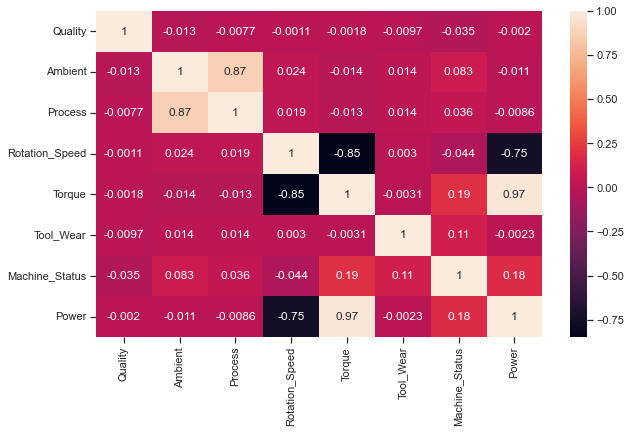

In [142]:
cor = Factory.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [143]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
X = Factory.drop(['Machine_Status'],axis =1)
y=Factory.Machine_Status 

chi_scores = chi2(X,y)
chi_scores
# first array represents chi square values
# second array represents p-values

#null hypothesis attribute is independent
#alternate hypothesis is attribute is not independent

#element 1 and element 2 of p-values is high , it is independent and does not contribute 
#much to our model.

(array([2.00032685e+01, 2.02684738e+01, 1.47638149e+00, 7.71221876e+02,
        1.81924169e+03, 8.34625774e+03, 7.21807770e+06]),
 array([7.73099070e-006, 6.73004549e-006, 2.24341531e-001, 9.75183718e-170,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000]))

<AxesSubplot:>

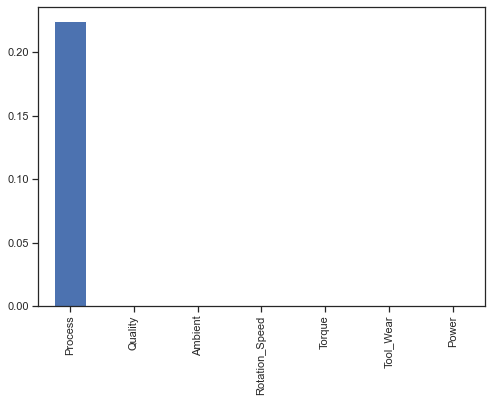

In [144]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

In [145]:
# pip install mlxtend

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
X = Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']
knn = KNeighborsClassifier(n_neighbors=1)


efs1 = EFS(knn, 
           min_features=1,
           max_features=6,
           scoring='accuracy',
           print_progress=True) ### Use cross-validation generator here

efs1 = efs1.fit(X, y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

# feature_names = ('Quality', 'Ambient', 'Process', 'Rotation_Speed','Torque','Tool_Wear')
#if error, pip install mlxtend or restart kernel 

Features: 126/126

Best accuracy score: 1.00
Best subset (corresponding names): ('Ambient', 'Torque', 'Tool_Wear')


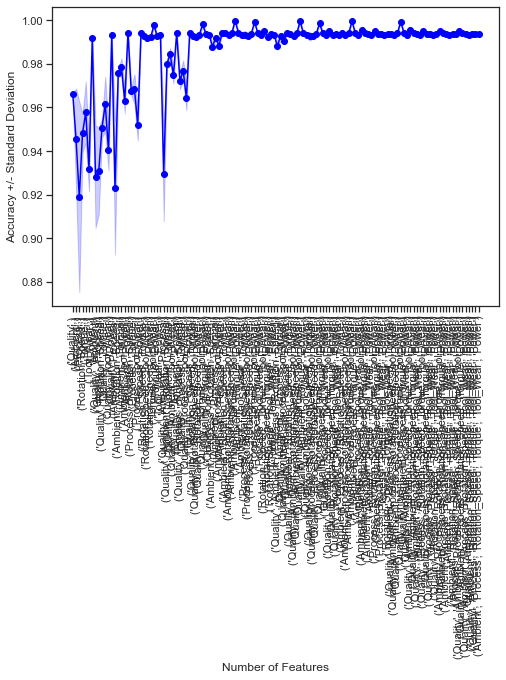

In [147]:

metric_dict = efs1.get_metric_dict()

fig = plt.figure()
k_feat = sorted(metric_dict.keys())
avg = [metric_dict[k]['avg_score'] for k in k_feat]

upper, lower = [], []
for k in k_feat:
    upper.append(metric_dict[k]['avg_score'] +
                 metric_dict[k]['std_dev'])
    lower.append(metric_dict[k]['avg_score'] -
                 metric_dict[k]['std_dev'])

plt.rcParams["figure.figsize"] = (8,5.5)
plt.fill_between(k_feat,
                 upper,
                 lower,
                 alpha=0.2,
                 color='blue',
                 lw=1)

plt.plot(k_feat, avg, color='blue', marker='o')
plt.ylabel('Accuracy +/- Standard Deviation')
plt.xlabel('Number of Features')
feature_min = len(metric_dict[k_feat[0]]['feature_idx'])
feature_max = len(metric_dict[k_feat[-1]]['feature_idx'])
plt.xticks(k_feat, 
           [str(metric_dict[k]['feature_names']) for k in k_feat], 
           rotation=90)
plt.show()

In [149]:
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Run the prep_data function
feat_X = Factory.drop(['Machine_Status'],axis=1)
feat_y= Factory['Machine_Status']



oversample = SMOTE(random_state=42)
X_feature, y_feature = oversample.fit_resample(feat_X, feat_y)

Smoted=pd. merge(X_feature, y_feature, left_index=True, right_index=True)
sns.set_theme(style="ticks")
sns.pairplot(Smoted, hue="Machine_Status")

### Tackling multicollinearity
##### As shown above , predictor variables correleted among themselves ,Ambient and Process have a correlation of 0.87 Rotation_Speed and Torque both too have a high correlation of -0.85 . I decided to choose Torque and Ambient as they have higher correlation to Machine_Status. Power also has lower correlation to Machine_Status as compared to Torque
##### As shown on pairplot Torque and Ambient is more distinguishable when compared to Process and Rotation Speed

##### On top of that, using exhaustive feature selection, we got the Best subset (corresponding names): ('Quality', 'Ambient', 'Torque', 'Tool_Wear')
##### i will then drop Process and Rotation_Speed and even Power although we feature engineered it


In [150]:
Factory = Factory.drop(['Process','Rotation_Speed','Power'],axis=1)

# Graphical analysis 
### We will be looking at count and distribution and tackling issues along the way

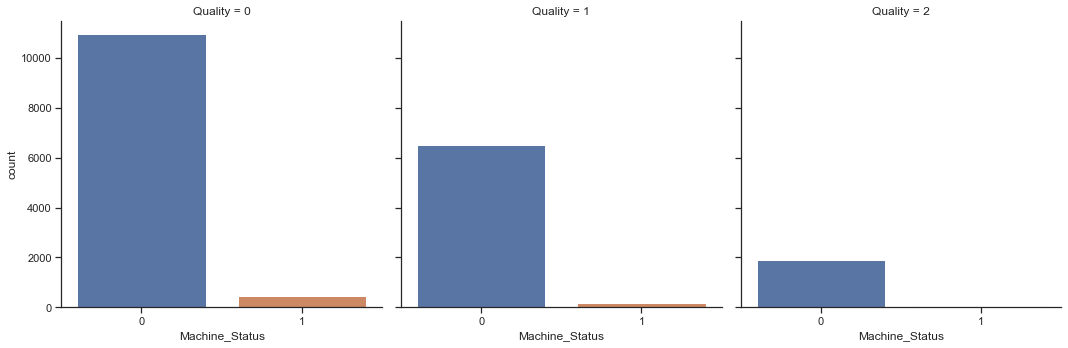

In [151]:
sns.catplot(x='Machine_Status', col='Quality', kind='count', data=Factory)

In [152]:
print("Sum of Failures for each group: "+ str( Factory.groupby(['Quality']).Machine_Status.sum()))
print("Failure rate for Low Quality : " + str(Factory[Factory.Quality == 0].Machine_Status.sum()/Factory[Factory.Quality == 0].Machine_Status.count()))
print("Failure rate for Medium Quality : "+ str(Factory[Factory.Quality == 1].Machine_Status.sum()/Factory[Factory.Quality == 1].Machine_Status.count()))
print("Failure rate for High Quality : " + str(Factory[Factory.Quality == 2].Machine_Status.sum()/Factory[Factory.Quality == 2].Machine_Status.count()))
#The higher the quality the lower the percentage of failures among that group

Sum of Failures for each group: Quality
0    445
1    192
2     41
Name: Machine_Status, dtype: int64
Failure rate for Low Quality : 0.03906935908691835
Failure rate for Medium Quality : 0.028712427097353072
Failure rate for High Quality : 0.021320852834113363


### Tackling imbalance
#### We see a huge inbalance of data with 193222 Normal and 678 failures , Failure rate is around 2%.

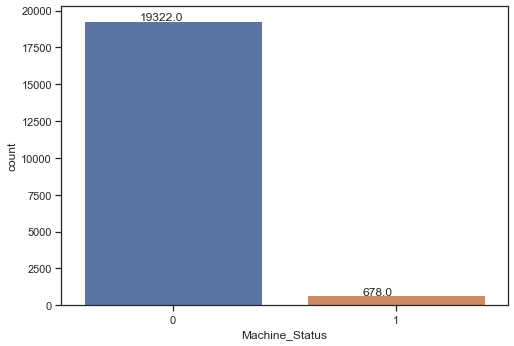

In [153]:
ax =sns.countplot(x='Machine_Status', data=Factory)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()


In [154]:
# pip install imblearn

c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '15459'), Text(0, 0, '15459')]

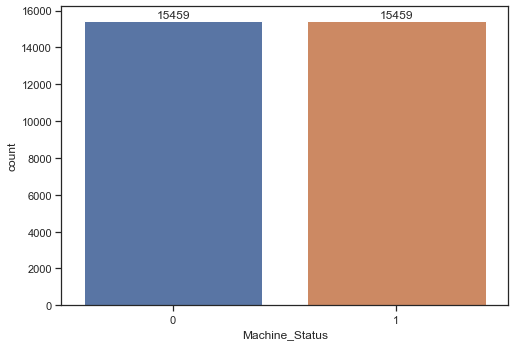

In [155]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Run the prep_data function
X = Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
# Define the resampling method
# method = SMOTE()
# Create the resampled feature set
# X, y = method.fit_sample(X, y)
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
# Plot the resampled data
ax = sns.countplot(y_smote,
                   order=y_smote.value_counts(ascending=False).index)

abs_values = y_smote.value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values)

### As shown above we tackled imbalance by oversampling the data with smote()

In [156]:
sns.histplot(Factory.Ambient, kde=True)

<AxesSubplot:xlabel='Ambient', ylabel='Count'>

<AxesSubplot:xlabel='Torque', ylabel='Count'>

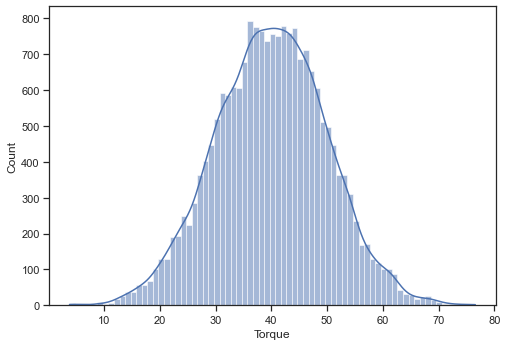

In [157]:
sns.histplot(Factory.Torque, kde=True)

In [158]:
sns.histplot(Factory.Tool_Wear, kde=True)

<AxesSubplot:xlabel='Tool_Wear', ylabel='Count'>

### The quantitative data varies in their range 
#### This suggests that scaling will be necessary 

## Showcasing Prediction model with scale and without scale 
### As shown below,scaled data enables the Machine Learning model to predict with better accuracy

In [210]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('Decision Trees', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train,y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test,y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test,y_test)))


Accuracy with Scaling: 0.9738333333333333
Accuracy without Scaling: 0.9721666666666666


#### Scaling improves performance and theoretically time taken as well
## Next We figure out the best model

In [176]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('Logistic Regression' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('K-nearest neighbor' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDTC' , (Pipeline([('scaled' , StandardScaler()),('Decision Trees' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))
pipelines.append(('scaledRFC' , (Pipeline([('scaled' , StandardScaler()),('Random Forest Classifier',RandomForestClassifier())]))))



# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21)


model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='f1')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison by f1')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

['scaledLR']: 0.969250 (0.005617)
['scaledLR', 'scaledKNN']: 0.975313 (0.002975)
['scaledLR', 'scaledKNN', 'scaledDTC']: 0.983250 (0.003871)
['scaledLR', 'scaledKNN', 'scaledDTC', 'scaledSVC']: 0.975312 (0.004500)
['scaledLR', 'scaledKNN', 'scaledDTC', 'scaledSVC', 'scaledMNB']: 0.970313 (0.005493)
['scaledLR', 'scaledKNN', 'scaledDTC', 'scaledSVC', 'scaledMNB', 'scaledRFC']: 0.987875 (0.002534)


AUC: 0.9295656927052276
0.97525
AUC: 0.9158715961041544
0.98825
AUC: 0.8094335122242099
0.9685
AUC: 0.8701053468495329
0.971
AUC: 0.9001053468495328
0.97075
AUC: 0.9857712184456371
0.9875


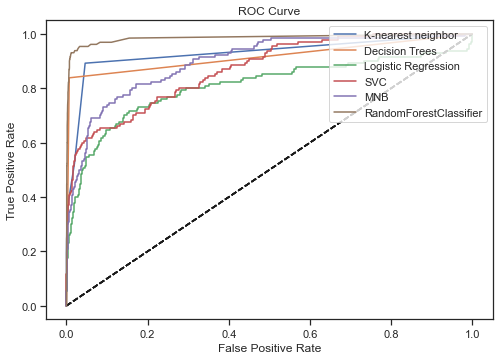

In [177]:
#try different models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


Factory_scaled=Factory
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
Factory_scaled[['Torque','Ambient','Tool_Wear']] = mms.fit_transform(Factory_scaled[['Torque','Ambient','Tool_Wear']])

X= Factory_scaled.drop(['Machine_Status'],axis=1)
y= Factory_scaled['Machine_Status']
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=35)

models = {
    'K-nearest neighbor': KNeighborsClassifier(),
    'Decision Trees': DecisionTreeClassifier(),
    'Logistic Regression':LogisticRegression(max_iter=500),
    'SVC' :SVC(probability=True),
    'MNB' :GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier()
}
accuracy=[]
for name in models:
    model=models[name]
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    


    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    # Compute and print AUC score
    print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))
    # Plot ROC curve
    # auc = round(roc_auc_score(y_test, y_pred_prob), 4)

    plt.plot([0, 1], [0, 1], 'k--')
    # AUC=''+str(auc)
    plt.plot(fpr, tpr,label=name)
    plt.legend(loc="upper right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

    accuracy.append(accuracy_score(y_test,y_hat))
    print(accuracy_score(y_test,y_hat))
plt.show()


#### With hyperparameter tuning 

### Before tuning I will be plotting a learning curve

In [219]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
 
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(20, 30))

# X, y = load_digits(return_X_y=True)

title = r"Learning Curves (RandomForest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = RandomForestClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = r"Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (KNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

In [196]:
# Scale only certain features
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

numeric_features = ["Ambient", "Torque","Tool_Wear"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Setup the pipeline

X= Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']

steps = [('preprocessor', preprocessor),
         ('RFC',RandomForestClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'RFC__n_estimators':np.arange(10,50,10),
                'RFC__max_depth':np.arange(31,51,3),
                'RFC__max_features':np.linspace(0.01,1,5)}

# Create train and test sets
# Create train and test sets
X = Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters,cv=5)

# Fit to the training set
cv.fit(X_smote,y_smote)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(cv, X_test, y_test)
plt.show()

from sklearn.metrics import f1_score
f1_score(y_test, y_pred)


Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3863
           1       0.65      0.91      0.76       137

    accuracy                           0.98      4000
   macro avg       0.82      0.94      0.87      4000
weighted avg       0.98      0.98      0.98      4000

Tuned Model Parameters: {'RFC__max_depth': 100, 'RFC__max_features': 0.01, 'RFC__n_estimators': 46}


c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7560975609756099

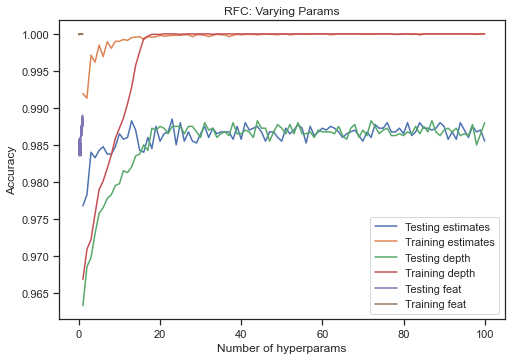

In [163]:
# Setup arrays to store train and test accuracies
n = np.arange(1,101)
max_depth=np.arange(1,101)

train_accuracy_n = np.empty(len(n))
test_accuracy_n = np.empty(len(n))
train_accuracy_md = np.empty(len(max_depth))
test_accuracy_md = np.empty(len(max_depth))



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=19)
# X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2,random_state=26)
# X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=21)


# Loop over different values of k
for i, k in enumerate(n):
    # Setup a k-NN Classifier with k neighbors: knn
    RFC = RandomForestClassifier(n_estimators=k)
    # Fit the classifier to the training data
    RFC.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy_n[i] = RFC.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy_n[i] = RFC.score(X_test, y_test)
for i, k in enumerate(max_depth):
    # Setup a k-NN Classifier with k neighbors: knn
    RFC = RandomForestClassifier(max_depth=k)
    # Fit the classifier to the training data
    RFC.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy_md[i] = RFC.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy_md[i] = RFC.score(X_test, y_test)

# Generate plot
plt.title('RFC: Varying Params')
plt.plot(n, test_accuracy_n, label = 'Testing estimates')
plt.plot(n, train_accuracy_n, label = 'Training estimates')
plt.plot(max_depth, test_accuracy_md, label = 'Testing depth')
plt.plot(max_depth, train_accuracy_md, label = 'Training depth')

plt.legend()
plt.xlabel('Number of hyperparams')
plt.ylabel('Accuracy')
plt.show()  


### Hyperparameter tuning for Decision Tree Classifier

Accuracy: 0.91525
              precision    recall  f1-score   support

           0       1.00      0.92      0.95      3863
           1       0.28      0.92      0.43       137

    accuracy                           0.92      4000
   macro avg       0.64      0.92      0.69      4000
weighted avg       0.97      0.92      0.94      4000

Tuned Model Parameters: {'DTC__max_depth': 15, 'DTC__max_features': 10, 'DTC__max_leaf_nodes': 50}


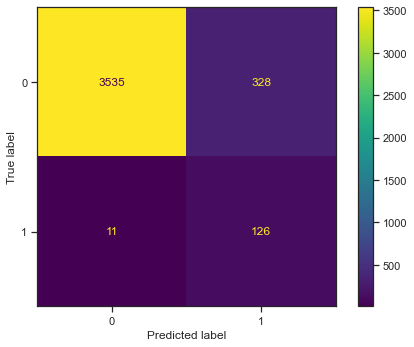

In [214]:
# Scale only certain features
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

numeric_features = ["Ambient", "Torque","Tool_Wear"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Setup the pipeline

X= Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']

steps = [('preprocessor', preprocessor),
         ('DTC',DecisionTreeClassifier(random_state=42))]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'DTC__max_depth':[2,6,8,10,15,20],
              'DTC__max_features':[10,25,50],
              'DTC__max_leaf_nodes':[5,20,50]}

# Create train and test sets
# Create train and test sets
X = Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,parameters)

# Fit to the training set
cv.fit(X_smote,y_smote)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=cv.classes_)
disp.plot()
plt.show()


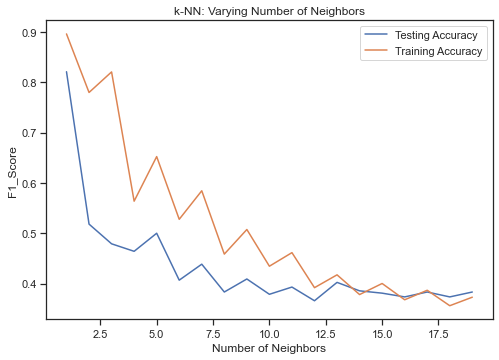

In [212]:
# Setup arrays to store train and test accuracies
from sklearn.metrics import f1_score
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2,random_state=39)

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors= k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training 
    y_train_pred=knn.predict(X_train_smote)
    # train_accuracy[i] = knn.score(X_train_smote, y_train_smote)
    train_accuracy[i] = f1_score(y_train_pred, y_train_smote) 

    #Compute accuracy on the testing set
    y_pred=knn.predict(X_test)
    # test_accuracy[i] = knn.score(X_test, y_test)
    test_accuracy[i] = f1_score(y_pred, y_test)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('F1_Score')
plt.show()



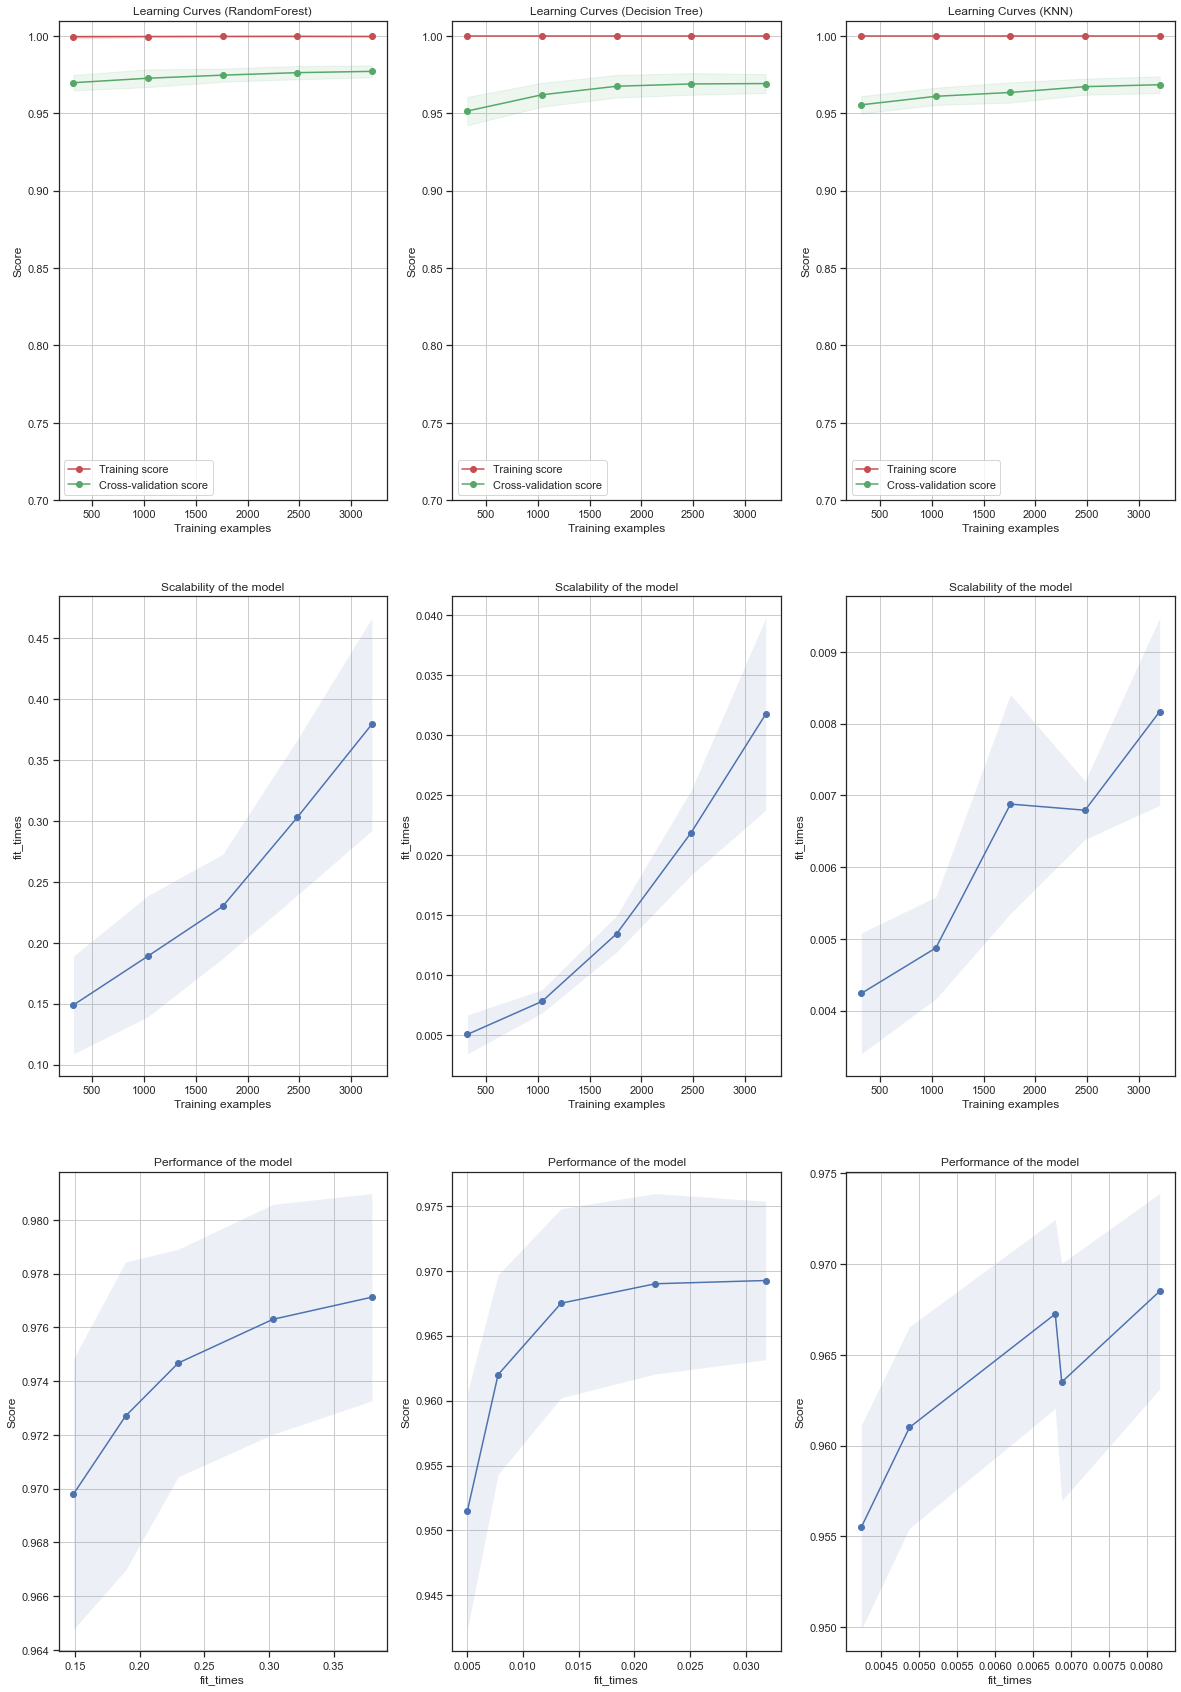

In [218]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=12)

def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
   
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
 
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 3, figsize=(20, 30))

# X, y = load_digits(return_X_y=True)

title = r"Learning Curves (RandomForest)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(max_depth= 100, max_features= 0.01, n_estimators= 46)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = r"Learning Curves (Decision Tree)"
estimator = DecisionTreeClassifier()
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (KNN)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=1)
plot_learning_curve(
    estimator, title, X, y, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

# Model Improvisation
- Bagging
- Boosting  
- Stacking 


https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
- bagging, that often considers homogeneous weak learners, learns them independently from each other in parallel and combines them following some kind of deterministic averaging process
- boosting, that often considers homogeneous weak learners, learns them sequentially in a very adaptative way (a base model depends on the previous ones) and combines them following a deterministic strategy
- stacking, that often considers heterogeneous weak learners, learns them in parallel and combines them by training a meta-model to output a prediction based on the different weak models predictions

### I have chosen stacking among the 3 types of model improvisation method,it is simple, not very computationally expensive and generally give better results than a single model
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#:~:text=Stacking%20allows%20to%20use%20the,the%20base%20estimators%20using%20cross_val_predict%20.


Accuracy: 0.9865
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3863
           1       0.79      0.83      0.81       137

    accuracy                           0.99      4000
   macro avg       0.89      0.91      0.90      4000
weighted avg       0.99      0.99      0.99      4000



c:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


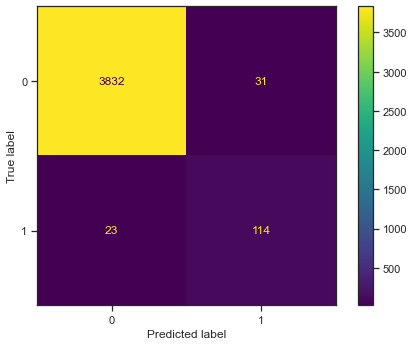

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
X = Factory.drop(['Machine_Status'],axis=1)
y= Factory['Machine_Status']

numeric_features = ["Ambient", "Torque","Tool_Wear"]
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)

estimators = [
    ('rf', RandomForestClassifier(max_depth= 100, max_features= 0.01, n_estimators= 46)),
    ('dt',DecisionTreeClassifier(max_depth= 15, max_features= 10, max_leaf_nodes= 50)),
    ('knn', KNeighborsClassifier(n_neighbors=1))
]
clf = StackingClassifier(
    estimators=estimators,
)
steps = [('preprocessor', preprocessor),
         ('StackingClassifier',clf)]

pipeline = Pipeline(steps)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=31)
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

clf.fit(X_smote, y_smote)
# Predict the labels of the test set: y_pred
y_pred = clf.predict(X_test)
from sklearn.metrics import plot_confusion_matrix
print("Accuracy: {}".format(clf.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
plot_confusion_matrix(clf, X_test, y_test)
plt.show()



In [235]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8085106382978724